In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
from sklearn.datasets import make_blobs

In [104]:
data = make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.0,random_state=101)

In [105]:
X,y = data

In [106]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [107]:
feat = pd.DataFrame(X)

In [108]:
feat = pd.concat([feat,z_noise],axis=1)

In [109]:
feat.columns = ['X1','X2','X3']

In [110]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


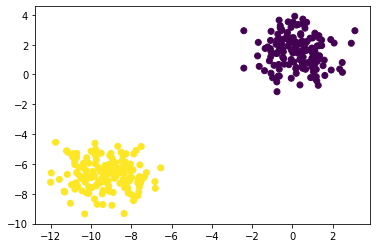

In [111]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [112]:
from mpl_toolkits.mplot3d import Axes3D

In [113]:
# %matplotlib notebook

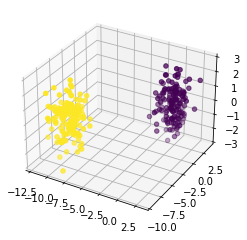

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [116]:
from tensorflow.keras.optimizers import SGD

In [117]:
encoder = Sequential()

encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [118]:
decoder = Sequential()

decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [119]:
autoencoder = Sequential([encoder,decoder])

In [120]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(feat)

In [123]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 715us/step - loss: 0.2622
Epoch 2/5
10/10 [==============================] - 0s 746us/step - loss: 0.2304
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2658
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2585
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2556


In [124]:
encoded_2dim = encoder.predict(scaled_data)

In [125]:
encoded_2dim.shape

(300, 2)

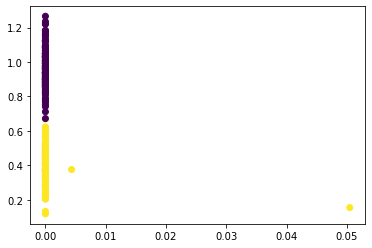

In [126]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)